In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
vocab_size = 10000

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load offline CSV dataset
df = pd.read_csv("IMDB_Dataset.csv")  # Make sure this file is in the same directory

# Map sentiment labels to integers
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
texts = df['review'].values
labels = df['sentiment'].values

# Tokenization
vocab_size = 10000
max_len = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# Dataset is ready for training
print(f'Training samples: {len(x_train)}, Testing samples: {len(x_test)}')

Training samples: 40000, Testing samples: 10000


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [5]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((25000,), (25000,)), ((25000,), (25000,)))

In [6]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
int(np.mean(np.array([len(row) for row in x_train])).round())

239

In [8]:
max_length = int(np.mean(np.array([len(row) for row in x_train])).round())

In [9]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 512, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 239, 512)          5120000   
                                                                 
 flatten (Flatten)           (None, 122368)            0         
                                                                 
 dense (Dense)               (None, 16)                1957904   
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7077921 (27.00 MB)
Trainable params: 7077921 (27.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


196/196 [==============================] - 52s 253ms/step - loss: 0.6714 - accuracy: 0.5854 - val_loss: 0.5990 - val_accuracy: 0.7265
Epoch 2/5
196/196 [==============================] - 48s 247ms/step - loss: 0.4240 - accuracy: 0.8485 - val_loss: 0.3775 - val_accuracy: 0.8436
Epoch 3/5
196/196 [==============================] - 50s 256ms/step - loss: 0.2430 - accuracy: 0.9224 - val_loss: 0.3182 - val_accuracy: 0.8662
Epoch 4/5
196/196 [==============================] - 49s 248ms/step - loss: 0.1623 - accuracy: 0.9556 - val_loss: 0.2985 - val_accuracy: 0.8706
Epoch 5/5
196/196 [==============================] - 50s 257ms/step - loss: 0.1093 - accuracy: 0.9790 - val_loss: 0.2904 - val_accuracy: 0.8763


In [14]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 12s 15ms/step - loss: 0.2904 - accuracy: 0.8763


[0.29042747616767883, 0.8762800097465515]

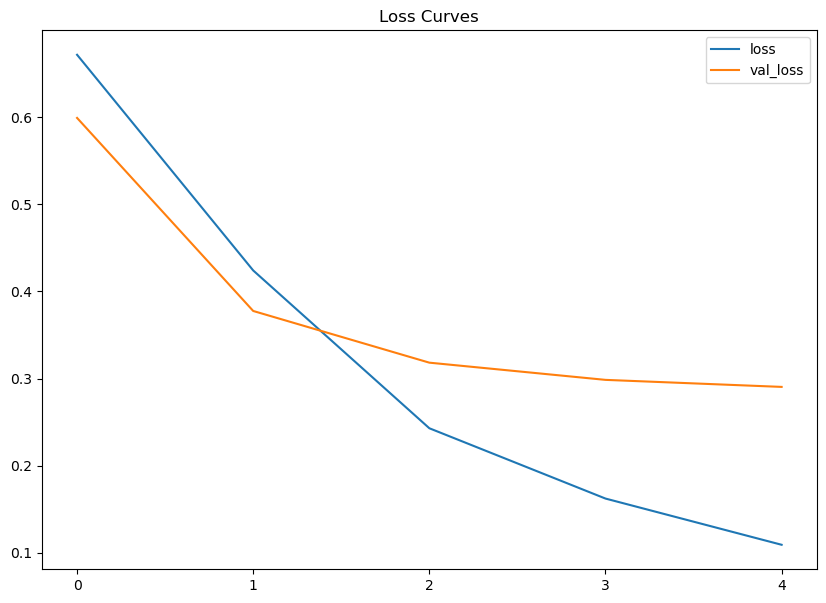

In [15]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10,7))
plt.title("Loss Curves")
plt.xticks([0, 1, 2, 3, 4])
plt.show()

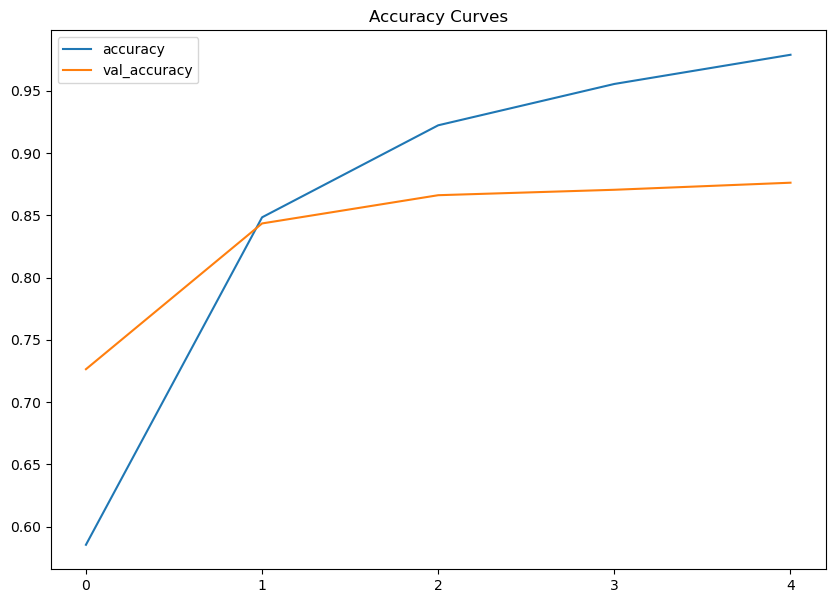

In [16]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10,7))
plt.title("Accuracy Curves")
plt.xticks([0, 1, 2, 3, 4])
plt.show()

In [17]:
y_pred = model.predict(x_test)

782/782 [==============================] - 11s 14ms/step


In [18]:
predicted_labels = (y_pred > 0.5).astype(int)

In [19]:
report = classification_report(y_test, predicted_labels, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88     12500
    Positive       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



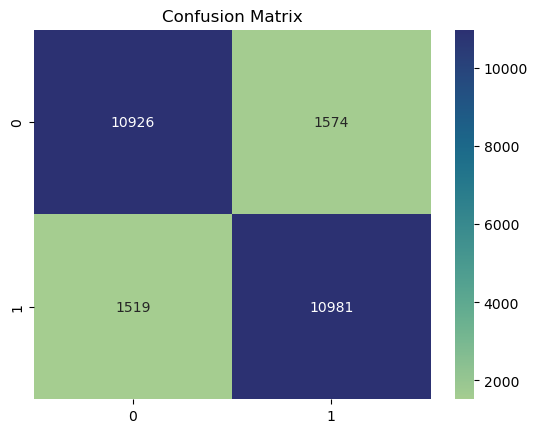

In [20]:
cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, cmap='crest', annot=True, fmt=".0f")
plt.title("Confusion Matrix")
plt.show()